<a href="https://colab.research.google.com/github/AFBA1993/Projects/blob/main/%20Projects/TemporalSeries/PAGS/PAGS_analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
from keras.metrics import mean_squared_error
from keras.models import load_model

# **AUXILIAR FUNCTIONS:**

In [50]:
def forecasting(FORECAST_DAYS, LOOK_BACK, train,test, model):

  input_train = train.values
  input_train = input_train.reshape((-1, 1))
  scaler = MinMaxScaler(feature_range = (0,1))
  input_train = scaler.fit_transform(input_train)

  forecasted_lst = []
  input_forecast = test[len(test) - LOOK_BACK :].values
  input_forecast = scaler.fit_transform(input_forecast)
  input_forecast = np.reshape(input_forecast, (1, LOOK_BACK,1))



  for i in range(FORECAST_DAYS):
    forecast = model.predict(input_forecast)
    forecasted_lst.append(forecast)
    input_forecast = np.reshape(input_forecast, (input_forecast.shape[1], 1))
    input_forecast = np.concatenate((input_forecast,forecast))
    input_forecast = input_forecast[-LOOK_BACK:]
    input_forecast = np.reshape(input_forecast, (1, LOOK_BACK,1))


  forecasted_lst = np.array(forecasted_lst)
  forecasted_lst = forecasted_lst.reshape((-1, 1))
  forecasted_lst = scaler.inverse_transform(forecasted_lst)

  last_test_date = test.index[-1]
  initial_forecast_date = pd.date_range(last_test_date, periods = 2, freq='D' )
  initial_forecast_date = initial_forecast_date[-1]

  forecast_dates = pd.date_range(initial_forecast_date, periods = 
                                      FORECAST_DAYS, freq='D')
    

  LSTM_forecast = pd.DataFrame(forecasted_lst, columns = ['Close'])
  LSTM_forecast["Date"] = forecast_dates
  LSTM_forecast.index = LSTM_forecast["Date"]
  LSTM_forecast.drop("Date", axis = 1, inplace =  True)

  return LSTM_forecast


# **LOADING DATA:**

In [3]:
url = ('https://raw.githubusercontent.com/AFBA1993/Projects/main/'+
       'TemporalSeries/PAGS/PAGSattempt.csv')

In [4]:
url_data = requests.get(url).content
raw_data = pd.read_csv(io.StringIO(url_data.decode('utf-8')))

In [5]:
raw_data = raw_data[["Date","Close"]]
raw_data.index = pd.to_datetime(raw_data["Date"])
raw_data.drop("Date", axis = 1, inplace =  True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


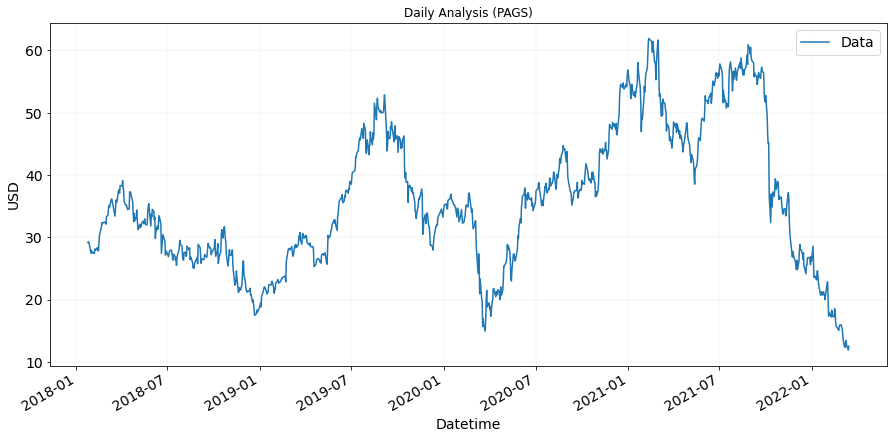

In [26]:
FONTSIZE = 14
plt.title('Daily Analysis PAGS', fontsize = FONTSIZE )
raw_data.Close.plot(figsize = (15,7), title = 'Daily Analysis (PAGS)', 
                 fontsize =14, label = 'Data')
plt.xlabel('Datetime', fontsize =FONTSIZE)
plt.ylabel('USD', fontsize =FONTSIZE)
plt.legend(loc = 'best', fontsize =FONTSIZE)
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.3')

plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best', fontsize =FONTSIZE)

# **SPLITTING DATA:**

In [7]:
SPLIT_PERCENT = 0.80
split = int(SPLIT_PERCENT*len(raw_data))
train = raw_data[:split]
test = raw_data[split:]

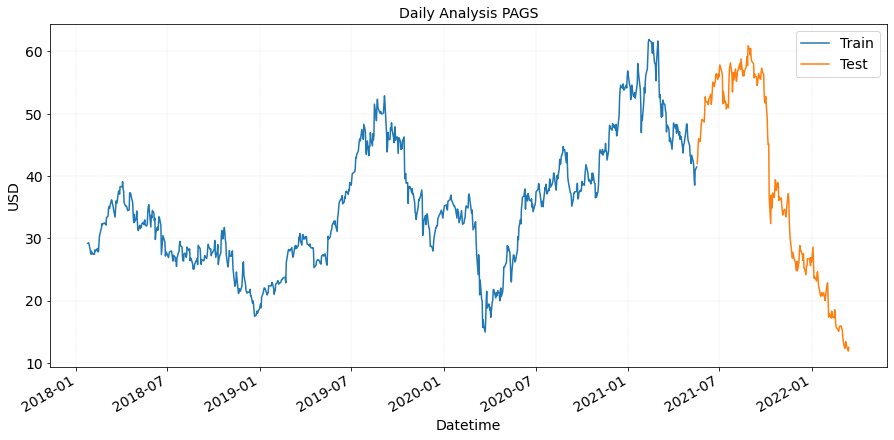

In [23]:
FONTSIZE = 14
plt.title('Daily Analysis PAGS', fontsize = FONTSIZE )
train.Close.plot(figsize = (15,7), label = 'Train', fontsize =FONTSIZE)
test.Close.plot(figsize = (15,7), label = 'Test', fontsize =FONTSIZE)
plt.xlabel('Datetime', fontsize =FONTSIZE)
plt.ylabel('USD', fontsize =FONTSIZE)
plt.legend(loc = 'best', fontsize =FONTSIZE)
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.3')


# **LOADING MODELS:**

In [32]:
model_1 = load_model('/content/drive/MyDrive/STOCK PRIZES/model_1.h5')
model_2 = load_model('/content/drive/MyDrive/STOCK PRIZES/model_2.h5')
model_3 = load_model('/content/drive/MyDrive/STOCK PRIZES/model_3.h5')
model_4 = load_model('/content/drive/MyDrive/STOCK PRIZES/model_4.h5')

In [57]:
FORECAST_DAYS = 200
forecast_model1 = forecasting(FORECAST_DAYS, 100, train, test, model_1)
forecast_model2 = forecasting(FORECAST_DAYS, 100, train, test, model_2)
forecast_model3 = forecasting(FORECAST_DAYS, 100, train, test, model_3)
forecast_model4 = forecasting(FORECAST_DAYS, 150, train, test, model_4)

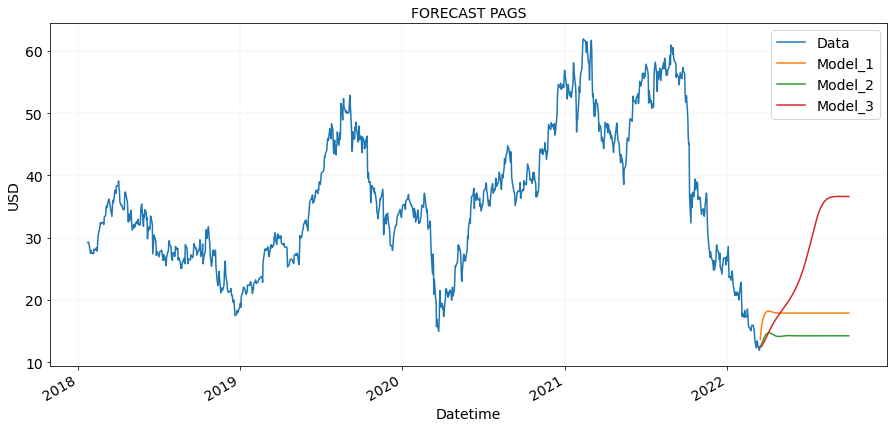

In [60]:
FONTSIZE = 14
plt.title('FORECAST PAGS', fontsize = FONTSIZE )
raw_data.Close.plot(figsize = (15,7), 
                 fontsize =14, label = 'Data')
forecast_model1.Close.plot( label = 'Model_1')
forecast_model2.Close.plot( label = 'Model_2')
forecast_model3.Close.plot( label = 'Model_3')
#forecast_model4.Close.plot( label = 'Model_4')

plt.xlabel('Datetime', fontsize =FONTSIZE)
plt.ylabel('USD', fontsize =FONTSIZE)
plt.legend(loc = 'best', fontsize =FONTSIZE)
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.3')

plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best', fontsize =FONTSIZE)

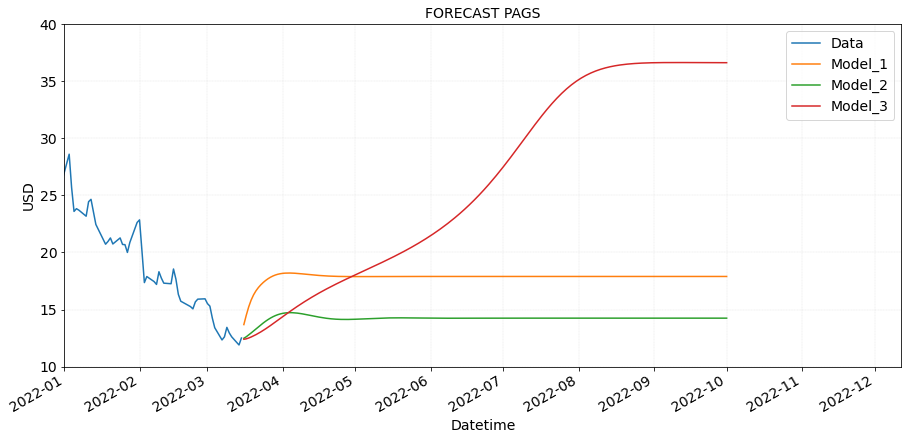

In [68]:
FONTSIZE = 14

plt.title('FORECAST PAGS', fontsize = FONTSIZE )
raw_data.Close.plot(figsize = (15,7), 
                 fontsize =14, label = 'Data')
forecast_model1.Close.plot( label = 'Model_1')
forecast_model2.Close.plot( label = 'Model_2')
forecast_model3.Close.plot( label = 'Model_3')
#forecast_model4.Close.plot( label = 'Model_4')
plt.xlim('2022-01-01', '2022-12-12' )
plt.ylim(10, 40)
plt.xlabel('Datetime', fontsize =FONTSIZE)
plt.ylabel('USD', fontsize =FONTSIZE)
plt.legend(loc = 'best', fontsize =FONTSIZE)
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.3')

plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best', fontsize =FONTSIZE)